In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import copy

from sklearn import tree

import scipy.optimize as opt

from sympy import integrate
import sympy

# 1 Classifiers for Basketball Courts

## (a) Run the Perceptron algorithm to compute a linear classifier that passes through the origin. How many iterations does it take to converge? What is the error of the classifier? Are there any other solutions that give the same error? Plot the observed data, the decision boundary found by the Perceptron algorithm, and describe in the plot any other linear decision boundaries passing through the origin that have the same error2.

In [11]:
def perceptron(S, I, converge=1):
    # initialization
    w = [0 for d in range( len(S[0][0]) )]
    W = []
    for e in range(I):
        mistakes = 0 # number of mistakes made in each epoch
        for i in range(len(S)): # iterate over dataset
            if S[i][1] * np.dot(w, S[i][0]) <= 0: # label not agree with prediction
                mistakes += 1
                w += np.dot(S[i][1], S[i][0])
        W.append(copy.deepcopy(w)) # save w after each epoch
        if ( 1 - mistakes / len(S) ) >= converge: # converges
            break
    return W

In [12]:
def accuracy(S, W):
    accuracy = []
    for e in range(len(W)): # for each epoch
        mistakes = 0
        for i in range(len(S)): # count mistakes
            if S[i][1] * np.dot(W[e], S[i][0]) <= 0: # label not agree with prediction
                mistakes += 1
        accuracy.append( 1 - mistakes / len(S) ) # update list of accuracy for each epoch
    return accuracy

In [3]:
# observed data
X=[ ([.75,.10], -1),
    ([.85,.80], -1),
    ([.85,.95],  1),
    ([.15,.10], -1),
    ([.05,.25],  1),
    ([.05,.50],  1),
    ([.85,.25], -1)]

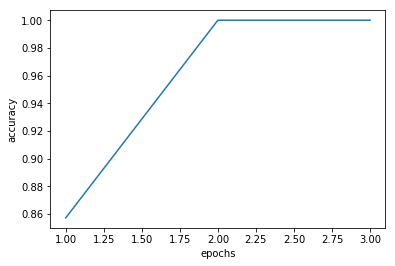

In [57]:
# run perceptron algorithm and draw the evolution of accuracy after each epoch
W=perceptron(X,100)
acc=accuracy(X,W)
plt.plot(range(1, len(acc)+1), acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
pass

It takes 2 epochs of iteration of the dataset to converge. The error is 0.

In [15]:
W[-1]

array([-1.05,  1.1 ])

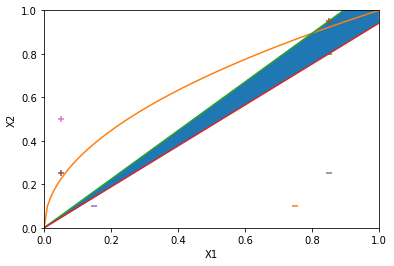

In [22]:
x1=np.linspace(0,1,100)
y1=1.05/1.1*x1
y2=np.sqrt(x1)
y3=0.95/0.85*x1
y4=0.8/0.85*x1
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.plot(x1,y4)
plt.fill_between(x1, y3, y4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0,1)
plt.ylim(0,1)
for i in range(len(X)):
    if X[i][1]==1:
        plt.scatter(X[i][0][0], X[i][0][1], marker='+')
    else:
        plt.scatter(X[i][0][0], X[i][0][1], marker='_')
pass

For the linear decision boundaries passing through the origin, any one $X_2=kX_1$ with k between 0.95/0.85 and 0.8/0.85 (shaded area)would also achieve the same error

## (b) Grow a fully-grown decision tree using the reduction in the Gini index as the splitting criterion. What is its error? By adjusting the threshold of each split, are there any other solutions that give the same error? Plot the observed data, the decision boundaries of the decision tree, and describe in the plot any other decision trees you found by adjusting the threshold that have the same error.

![](1b.png)

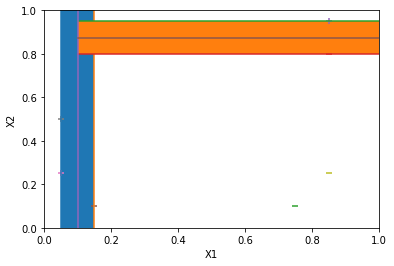

In [29]:
x1=np.array([0.05 for i in range(100)])
x2=np.array([0.15 for i in range(100)])
y1=np.linspace(0,1,100)
plt.plot(x1,y1)
plt.plot(x2,y1)
plt.fill_betweenx(y1,x1,x2)

x3=np.linspace(0.1,1,100)
y2=np.array([0.95 for i in range(100)])
y3=np.array([0.8 for i in range(100)])
plt.plot(x3,y2)
plt.plot(x3,y3)
plt.fill_between(x3,y2,y3)

plt.plot([0.1 for i in range(100)], np.linspace(0,1,100))
plt.plot(np.linspace(0.1,1,100), [0.875 for i in range(100)])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0,1)
plt.ylim(0,1)
for i in range(len(X)):
    if X[i][1]==1:
        plt.scatter(X[i][0][0], X[i][0][1], marker='+')
    else:
        plt.scatter(X[i][0][0], X[i][0][1], marker='_')
pass

The error is 0. 
For $ X1 \in (0.05, 0.15) $ and $ X2 \in (0.8,0.95) $ (shown as the shaded area) the decision boundary all give the same error.

## (c) What is the optimal linear classifier that passes through the origin and what is its error? Is this solution among the solutions that acheived the minimum empirical loss in part (a)? Draw the decision boundary on a plot of the court.

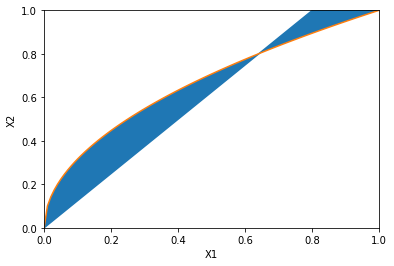

In [53]:
x1=np.linspace(0,1,100)
y1=1.2478*x1
y2=np.sqrt(x1)
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.fill_between(x1,y1,y2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0,1)
plt.ylim(0,1)
pass

Suppose the optimal linear classifier is $ y=kx $.

Given loss function, since the distribution of x is uniform, the error equals the area of the shades, e.g. the integral of the difference of these 2 lines in the range of X1.

$ Error = \int^{1/k^2}_0 ( \sqrt x - kx ) dx + \int^1_{1/k^2} ( kx - \sqrt x )dx - 1/2 (k-1)(1-1/k) $


In [21]:
from math import sqrt
from sympy import  integrate
from sympy.abc import  x,k  
integrate(x**0.5-k*x,(x,0,1/k/k))+integrate(k*x-x**0.5,(x, 1/k/k,1))-1/2*(k-1)*(1-1/k)


k/2 - (1 - 1/k)*(0.5*k - 0.5) + 1.33333333333333*(k**(-2))**1.5 - 0.666666666666667 - 1/k**3

In [20]:
def fun(k):
    return k/2 - (1 - 1/k)*(0.5*k - 0.5) + 1.33333333333333*(k**(-2))**1.5 - 0.666666666666667 - 1/k**3
opt.fmin(fun,0.5)


Optimization terminated successfully.
         Current function value: 0.097631
         Iterations: 17
         Function evaluations: 34


array([ 1.41425781])

So k=1.41425781, $ f_{min}=0.097631$

It is not among the ones achieved in part (a).

# (d) What is the optimal depth 2 decision tree and what is its error?

### Split on X1 first:
```matlab
>> Error=int(b-sqrt(x),0,b^2)+int(sqrt(x)-b,b^2,a)+int(c-sqrt(x),a,c^2)+int(sqrt(x)-c,c^2,1)
 
Error =
 
(4*a^(3/2))/3 - (2*(b^6)^(1/2))/3 - (4*(c^2)^(3/2))/3 - b*(- b^2 + a) - c*(- c^2 + a) - (2*(b^2)^(3/2))/3 + b^3 + c*(c^2 - 1) + 2/3

>> fun=@(q)4/3*q(1)^(3/2)+2/3*q(2)^3+2/3*q(3)^3-q(1)*q(2)-q(1)*q(3)-q(3)+2/3

fun =

  包含以下值的 function_handle:

    @(q)4/3*q(1)^(3/2)+2/3*q(2)^3+2/3*q(3)^3-q(1)*q(2)-q(1)*q(3)-q(3)+2/3

>> s=ga(fun,3,[-1 0 0;0 -1 0;0 0 -1;1 0 0;0 1 0;0 0 1],[0 0 0 1 1 1])
Optimization terminated: average change in the fitness value less than options.FunctionTolerance.

s =

    0.4249    0.4608    0.8439

>> fun(s)

ans =

    0.1036

```
![](1dx1.png)
The error is 0.1036

### Split on X2 first:
```
>> Error=int(sqrt(x),0,b)+int(a-sqrt(x),b,a^2)+int(sqrt(x)-a,a^2,c)+int(1-sqrt(x),c,1)
 
 
Error =
 
(2^(1/2)*(a^2 + 1)^(3/2))/3 - (2*(a^2)^(3/2))/3 + ((2^(1/2) - 4)*(a^2)^(3/2))/6 + a*(a^2/2 - 1/2) - a^2/2 + a^3/2 + (2^(1/2)*(a^6)^(1/2))/6 - 1/6
 
>> fun=@(q)((q(3)^(1/2) - 1)^2*(2*q(3)^(1/2) + 1))/3 - (4*(q(1)^2)^(3/2))/3 - q(1)*(- q(1)^2 + q(2)) - q(1)*(- q(1)^2 + q(3)) + (4*q(2)^(3/2))/3 + (2*q(3)^(3/2))/3

fun =

  包含以下值的 function_handle:

    @(q)((q(3)^(1/2)-1)^2*(2*q(3)^(1/2)+1))/3-(4*(q(1)^2)^(3/2))/3-q(1)*(-q(1)^2+q(2))-q(1)*(-q(1)^2+q(3))+(4*q(2)^(3/2))/3+(2*q(3)^(3/2))/3

>> s=ga(fun,3,[-1 0 0;0 -1 0;0 0 -1;1 0 0;0 1 0;0 0 1],[0 0 0 1 1 1])
Optimization terminated: average change in the fitness value less than options.FunctionTolerance.

s =

    0.6077    0.0923    0.6462
    
>> fun(s)

ans =

    0.1180

```
![](1dx2.png)
The error is 0.1180

# (e) Transforming the variables X1 and/or X2 by applying a function might improve the mis-classification error.

The function could be $ f(x)=kx^2 $ where $ x \in X_2 $ and $ k \in R $

The optimal linear classifier becomes $ X_2 = \frac{1}{k}f(X_1) $

The error is 0

# (f) Using the same transformation, can a decision tree achieve the same error?

No. A line through the origin will always cross the boundary. So it will always make mistakes.

## (h) What is an optimal linear classifier that passes through the origin and what is its error (i.e., its true risk)?

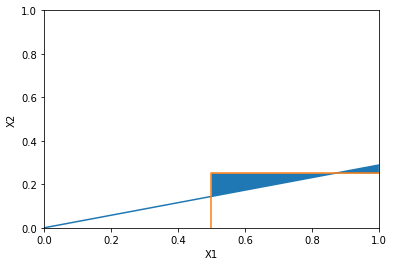

In [33]:
x1=np.linspace(0,1,100)
y1=0.2887*x1
plt.plot(x1,y1)

x2=np.linspace(0.5,1,100)
y2=np.array([0.25 for i in range(100)])
y3=0.2887*x2
plt.fill_between(x2, y2, y3)

plt.plot([0.5,0.5,1],[0,0.25,0.25])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0,1)
plt.ylim(0,1)
pass

like (c), compute the integral(e.g. area) of their difference in $ X_1 \in (0,1) $

When $ k \in (0.25,0.5) $

$ Error = \frac{1}{2}[((0.25/k - 0.5)^2 + (1 - 0.25/k)^2)k + 0.25k] $

Use Matlab to compute minimum:
```matlab
function  F= fun( k )
F=k/8 + (k*((1/(4*k) - 1)^2 + (1/(4*k) - 1/2)^2))/2;
end

>> [k_op, E_min]=fminbnd(@fun, 0.25,0.5)

k_op =

    0.2887


E_min =

    0.0580


```

When $ k\in (0,0.25) $
$ Error = 1/8 - k/4 > 1/16$

So $ y=0.2887x $ is an optimal classifier and error is 0.058

# (i) What is an optimal depth 2 decision tree and what is its error?

![](1i.png)

The error is 0.

# 2 Variable importance for trees and random forests

For simpleness presume the stump splits the points in the middle.
e.g. assign x<=s to 0 and x>s to 1

## (a) Grow a decision stump on the training dataset and answer the following questions.

### (i) Describe clearly (or draw) the decision stump based on the best split and the decision stump based on the best surrogate split.

In [7]:
def load_CSV(file_name):
    tmp = np.loadtxt(file_name, dtype=np.str, delimiter=",")
    features = tmp[1:,:-1].astype(np.float)# load features
    labels = tmp[1:,-1].astype(np.float)# load labels
    return features, labels # return ndarray

In [8]:
def binary_stump(X, Y, surrogate=False, dI_list=False):
    '''
    Returns index of the best split and best surrogate split.
    Could also return index of best surrogate split and variable importance measures for each variable.
    '''
    output = [None for i in range(3)]
    
    
    #find best split
    dI = [] #impurity measure reduction, for a stump with only one split, it's same as importance measurement
    for f in range(len(X[0])): #iterate through all features
        clp=0 # child left-of-split positive
        cln=0 #                     negative
        crp=0 #       right-of-split
        crn=0 #
        for n in range(len(X)): #iterate through all points
            if X[n][f] <= 0:
                if Y[n] > 0:
                    clp += 1
                else:
                    cln += 1
            else:
                if Y[n] > 0:
                    crp += 1
                else:
                    crn += 1
        #compute p for both left and right child
        pl = clp/(clp+cln)
        pr = crp/(crp+crn)
        #use Gini index as impurity measurement
        Il = 2*pl*(1-pl)
        Ir = 2*pr*(1-pr)
        I_after = ((clp+cln)*Il + (crp+crn)*Ir)/len(X) # impurity of each child on weight average
        I_before = 2*(crn+cln)*(clp+crp)/(len(X)**2)
        dI.append(I_before - I_after)
    
    idx_best = dI.index(max(dI)) # find maximum reduction in impurity measure
    output[0] = idx_best
    
    if dI_list:
        output[2] = dI
    
    #find best surrogate split
    if surrogate:
        if len(X[0]) == 1: # only one feature
            output[1] = 'NA'
        else:
            #compute min(pL, pR)
            pL = 0
            pR = 0
            for n in range(len(X)):
                if X[n][idx_best] <= 0:
                    pL += 1
                else:
                    pR += 1
            m = min(pL/len(X), pR/len(X))
            #compute lambda(Predictive Measure of Association)
            PMA = []
            for f in range(len(X[0])):
                if f != idx_best: #exclude best split
                    pLL = 0
                    pRR = 0
                    for n in range(len(X)):
                        if X[n][idx_best] <= 0 and X[n][f] <=0:
                            pLL += 1
                        if X[n][idx_best] > 0 and X[n][f] > 0:
                            pRR += 1
                    PMA.append( (m - (1 - pLL/len(X) - pRR/len(X)))/m )
            idx_surrogate = PMA.index(max(PMA)) #this index is without the column of best split
            idx_surrogate = idx_surrogate if idx_surrogate<idx_best else idx_surrogate+1 #bring the column of best split back

            output[1] = idx_surrogate
    
    
    while None in output:
        output.remove(None)
    return output

In [479]:
X, Y = load_CSV('train.csv')
binary_stump(X, Y, surrogate=True, dI_list=True)

[0,
 1,
 [0.2703185497750237,
  0.10556222981883362,
  0.0005964678609062801,
  0.0005550311283423759,
  0.00011621491914448612]]

so best split is on X1, the best surrogate split is on X2.

### (ii) Report the variable importance measurements from Equations (2) and (3) for the tree based on the best split.

Using equation 2:

Since a stump only has one split, the variable importance is numerically the same as its impurity reduction.

$ Imp^T(X_1)= 0.2703185497750237$

$ Imp^T(X_2)=0 $

$ Imp^T(X_3)=0 $

$ Imp^T(X_4)=0 $

$ Imp^T(X_5)=0 $

Using equation 3:

$ Imp^T(X_1)=0.2703185497750237 $

$ Imp^T(X_2)=0.10556222981883362 $

$ Imp^T(X_3)=0 $

$ Imp^T(X_4)=0 $

$ Imp^T(X_5)=0 $

X1 and X2 are more important than others

### (iii) Report the mean least-squares error of predictions on the test dataset of both decision stumps from part (a)(i).

In [4]:
def mse_for_binary_stump(X, Y, n):
    e = 0
    for i in range(len(X)):
        if X[i][n] != Y[i]:
            e += 1
    return e/len(X)

In [451]:
X, Y = load_CSV('test.csv')

In [452]:
mse_for_binary_stump(X, Y, 0)

0.1

mse for best split is 0.1

In [453]:
mse_for_binary_stump(X, Y, 1)

0.27

mse for best split is 0.27

## (b) Grow a random forest of decision stumps on the training dataset for K = 1, . . . , 5 randomly selected variables in each stump.

In [474]:
X, Y = load_CSV('train.csv')
#each column represents a feature
#each row represents a k value
best_matrix = []
surrogate_matrix = []
Imp5_matrix = []
Imp6_matrix = []

for k in range(1,6):
    best_list = [0 for i in range(5)]
    surrogate_list = [0 for i in range(5)]
    
    #preallocate space so its faster
    #use ndarray to do numerics(compute mean and std) on M*5 matrix
    Imp5_table = np.array([[0 for i in range(5)] for i in range(1000)], dtype=float)
    Imp6_table = np.array([[0 for i in range(5)] for i in range(1000)], dtype=float)
    for M in range(1000):
        
        c = np.random.choice(5,k,replace=False) #randomly pick k features
        r = np.random.choice(len(X),int(0.8*len(X)),replace=True) #bootstrap observations

        #for (i) count votes for best split and best surrogate split
        idx_best, idx_surrogate, dI = binary_stump(X[np.ix_(r, c)], Y[r], surrogate=True, dI_list=True) #grow stump on training data
        #the resulting index is relative to sampled index
       
        best_list[c[idx_best]] += 1 #count as a vote
        if idx_surrogate != 'NA': #k=1 there's no surrogate split
            surrogate_list[c[idx_surrogate]] += 1
            
        #for (ii) compute variable importance using equation 5
            Imp5_table[M][c[idx_best]] = dI[idx_best]
        
        #for (ii) compute variable importance using equation 6
        r_oob = list(set(range(len(X))) - set(r)) #remaining observations        
        tree_t = binary_stump(X[np.ix_(r_oob, c)], Y[r_oob]) #use oob rows to build a tree
        e1 = mse_for_binary_stump(X[np.ix_(r_oob, c)], Y[r_oob], tree_t) #error for OOB tree
        for j in range(len(c)):            
            X_permuted = X[np.ix_(r_oob, c)] #prepare a copy of oob's observations for permutation
            idx_permuted = np.random.permutation(range(len(X_permuted))) #generate a new order            
            for i in range(len(X_permuted)): #permutation
                X_permuted[i][j] = X[np.ix_(r_oob, c)][idx_permuted[i]][j]
            tree_permuted = binary_stump(X_permuted, Y[r_oob]) #permuted tree
            e2 = mse_for_binary_stump(X_permuted, Y[r_oob], tree_permuted) #error for permuted OOB tree
        
            Imp6_table[M][c[j]] = e2 - e1
            
    best_matrix.append( best_list )
    surrogate_matrix.append( surrogate_list )
    Imp5_matrix.append(Imp5_table.mean(axis=0))
    Imp6_matrix.append(Imp6_table.mean(axis=0))

best_matrix, surrogate_matrix, Imp5_matrix, Imp6_matrix

([[193, 201, 213, 187, 206],
  [406, 297, 100, 98, 99],
  [595, 301, 39, 41, 24],
  [792, 208, 0, 0, 0],
  [1000, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0],
  [0, 106, 286, 287, 321],
  [0, 330, 234, 172, 264],
  [0, 588, 138, 64, 210],
  [0, 1000, 0, 0, 0]],
 [array([ 0.,  0.,  0.,  0.,  0.]),
  array([ 0.10957607,  0.03130225,  0.00025041,  0.00029355,  0.00022937]),
  array([  1.61073806e-01,   3.15645630e-02,   1.78685373e-04,
           1.07255466e-04,   7.85373480e-05]),
  array([ 0.21349149,  0.02200919,  0.        ,  0.        ,  0.        ]),
  array([ 0.27067617,  0.        ,  0.        ,  0.        ,  0.        ])],
 [array([ 0.07142113,  0.04567689,  0.00379972, -0.00310813,  0.00105875]),
  array([ 0.12399624,  0.06818917,  0.00288835, -0.00300282,  0.00079027]),
  array([ 0.14219984,  0.06835988,  0.00096638, -0.00122951,  0.00027607]),
  array([ 0.15629116,  0.04621133,  0.        ,  0.        ,  0.        ]),
  array([ 0.13702304,  0.        ,  0.        ,  0.        ,  0.       

### (i) How many times is each variable the best split? How many times is each variable the best surrogate split? Does this suggest any variable(s) are more important than the others?

Please refer to best_matrix and surrogate matrix

X1 and X2 are more important than the others.

The obviousness of a variable's importance grows when k increases, since k is picked randomly.

### (ii) Compute the variable importance measures in Equations (5) and (6).Does this suggest any variable(s) are more important than the others? Recall that when using Equation (2) to compute variable importance for decision stumps, the phenomenon of “masking” can hide the potential variable importance of some variables. When using Equations (5) and (6) to compute variable importance for random forests, can masking similarly hide the potential variable importance of some variables, or is the impact of masking lessened? (On the topic of masking, you do not need to provide a numerical answer, just a brief discussion of the role of masking).


Please refer to Imp5_matrix and Imp6_matrix.

X1,X2 are more important

Compared to decision trees, decision forest tends to lesson the impact of masking. But when k=5, X1 is guaranteed to be selected, it masks potential important variable in this situation.

### (iii) Compute the mean least-squares loss on the test data using two methods. In the first method, use the majority vote of the stumps as the prediction and compute the loss. In the second method, find the predictions of each stump, compute least-squares loss on each, and average the results. Which method is correct for computing the prediction error of the random forest?

In the first method, use the majority vote of the stumps as the prediction and compute the loss.

In [9]:
X, Y = load_CSV('test.csv')

In [13]:
loss1_list = [0 for i in range(5)] #for each k
for k in range(5):
    loss1_list[k] = mse_for_binary_stump(X, Y, best_matrix[k].index(max(best_matrix[k])))
loss1_list

[0.49, 0.1, 0.1, 0.1, 0.1]

In the second method, find the predictions of each stump, compute least-squares loss on each, and average the results.

In [10]:
loss2_list = [0 for i in range(5)] #for each k
for k in range(5):
    for f in range(5):
        loss2_list[k] += mse_for_binary_stump(X, Y, f)*best_matrix[k][f]/1000
        
loss2_list

[0.38173, 0.2722, 0.19418999999999997, 0.13536, 0.1]

The first method is correct.

## (c) Grow a random forest of decision stumps with B = q × n bootstrap samples, for each of q ∈ {0.4, 0.5, 0.6, 0.7, 0.8}. Use K = 2 randomly selected variables in each stump (this is the closest to the default choice of √p ≈ 2.23) and M = 1000 stumps. In the first method, use the majority vote of the stumps as the prediction and compute the loss. In the second method, find the predictions of each stump, compute least-squares loss on each, and average the results. Which method is correct for computing the prediction error of the random forest?

In [473]:
X, Y = load_CSV('train.csv')
#each column represents a feature
#each row represents a k value
best_matrix = []
surrogate_matrix = []
Imp5_matrix = []
Imp5std_matrix = []
Imp6_matrix = []
Imp6std_matrix = []

for q in [0.4, 0.5, 0.6, 0.7, 0.8]:
    best_list = [0 for i in range(5)]
    surrogate_list = [0 for i in range(5)]

    Imp5_table = np.array([[0 for i in range(5)] for i in range(1000)], dtype=float)
    Imp6_table = np.array([[0 for i in range(5)] for i in range(1000)], dtype=float)
    for M in range(1000):
        
        c = np.random.choice(5,2,replace=False) #randomly pick k features
        r = np.random.choice(len(X),int(q*len(X)),replace=True) #bootstrap observations

        #for (i) count votes for best split and best surrogate split
        idx_best, idx_surrogate, dI = binary_stump(X[np.ix_(r, c)], Y[r], surrogate=True, dI_list=True) #grow stump on training data
        #the resulting index is relative to sampled index
       
        best_list[c[idx_best]] += 1 #count as a vote
        if idx_surrogate != 'NA': #k=1 there's no surrogate split
            surrogate_list[c[idx_surrogate]] += 1
            
        #for (ii) compute variable importance using equation 5
            Imp5_table[M][c[idx_best]] = dI[idx_best]
        
        #for (ii) compute variable importance using equation 6
        r_oob = list(set(range(len(X))) - set(r)) #remaining observations        
        tree_t = binary_stump(X[np.ix_(r_oob, c)], Y[r_oob]) #use oob rows to build a tree
        e1 = mse_for_binary_stump(X[np.ix_(r_oob, c)], Y[r_oob], tree_t) #error for OOB tree
        for j in range(len(c)):            
            X_permuted = X[np.ix_(r_oob, c)] #prepare a copy of oob's observations for permutation
            idx_permuted = np.random.permutation(range(len(X_permuted))) #generate a new order            
            for i in range(len(X_permuted)): #permutation
                X_permuted[i][j] = X[np.ix_(r_oob, c)][idx_permuted[i]][j]
            tree_permuted = binary_stump(X_permuted, Y[r_oob]) #permuted tree
            e2 = mse_for_binary_stump(X_permuted, Y[r_oob], tree_permuted) #error for permuted OOB tree
        
            Imp6_table[M][c[j]] = e2 - e1
            
    best_matrix.append( best_list )
    surrogate_matrix.append( surrogate_list )
    Imp5_matrix.append(Imp5_table.mean(axis=0))
    Imp5std_matrix.append(Imp5_table.std(axis=0))
    Imp6_matrix.append(Imp6_table.mean(axis=0))
    Imp6std_matrix.append(Imp6_table.std(axis=0))

best_matrix, surrogate_matrix, Imp5_matrix, Imp6_matrix, Imp5std_matrix, Imp6std_matrix

([[355, 300, 110, 131, 104],
  [419, 277, 113, 104, 87],
  [371, 339, 102, 100, 88],
  [406, 290, 97, 116, 91],
  [391, 289, 108, 119, 93]],
 [[0, 92, 273, 320, 315],
  [0, 114, 289, 279, 318],
  [0, 94, 274, 301, 331],
  [0, 89, 307, 301, 303],
  [0, 90, 304, 268, 338]],
 [array([ 0.09623129,  0.03295723,  0.00058393,  0.00072858,  0.00047822]),
  array([ 0.1128168 ,  0.02942892,  0.00049635,  0.0003476 ,  0.00030009]),
  array([ 0.09973266,  0.03552601,  0.00035267,  0.00033933,  0.00021404]),
  array([ 0.10952892,  0.03009467,  0.00028424,  0.00031097,  0.00021074]),
  array([ 0.10566026,  0.03026668,  0.0003598 ,  0.00035735,  0.00021972])],
 [array([ 0.10891909,  0.06842165,  0.00265634, -0.00245961,  0.00114416]),
  array([ 0.12703885,  0.06290584,  0.0028174 , -0.00357756,  0.0012235 ]),
  array([ 0.11452729,  0.07746121,  0.00277856, -0.00281501,  0.00133799]),
  array([ 0.12909   ,  0.06646873,  0.00264669, -0.00304943,  0.00122298]),
  array([ 0.12179262,  0.06568933,  0.0028

### (i) Compute the variable importance measurements in Equations (5) and (6). Does this suggest any variable(s) are more important than the others?

Please refer to Imp5_matrix and Imp6_matrix.

It suggests X1,X2 are more important

### (ii) Compute the standard deviation of the variable importance measurements in Equations (5) and (6). That is, instead of computing the mean over the M stumps in Equations (5) and (6), compute the sample standard deviation.

Please refer to Imp5std_matrix and Imp6std_matrix.